# Sampling and statistics: Introduction

## Key concepts
* types of data
* types of error
* mean
* variance
* normal distribution 
* skewed distribution
* standard deviation
* standard error

## Focus questions

* What is the difference between accuracy and precision? 
* What are sources of error in the data you work with?
* What is the difference between the standard deviation and standard error?

## Types of Data 
* __Discrete__ - represented by an integer (whole number)- counts, presence/absence <br>
* __Continuous__ - represented by real<sup>1</sup> numbers (e.g. temperature, wave speed, length of an organism, concentration)  <br>
* __Categorical__ - examples: species, sediment type, hair color, site # <br>
* __Metadata__ - "data describing data"

<sup>1</sup> *Actually, vectors can be represented as complex numbers with an imaginary part*

## Types of Measurements
__Nominal__ - categories of equal rank<br>
* Species Description (phytoplankton types: diatoms, coccolithophores, etc.) 


__Ordinal__ - Categories have a logically defined rank. Steps arent equal in size or quantifiable

* Visual classification of sediment grains: angularity and sphericity
* Hurricane scale: ranking is not equivalent to strength
* Beaufort Wind Scale: Mariner estimate of wind from wave climate. Categories are defined in a logical order, but a sea state of 10 is not necessarily indicate that the winds are twice as strong as a sea state of 5.

__Scale__: __interval__ and __ratio__
	
* __interval scale__: constant succesive intervals, but the reference point is arbitrary e.g. Fahrenheit temperature scale 
* __ratio scale__: natural zero point (ex: length, mass, Kelvin temperature scale)

## Types of Error
* __Systematic error__  - systematically repeatable biased, i.e. some pattern in how they vary <br>
* __Random error__ - Impercise, but unbiased. Noise.

![error](images/error_type.png)

__Measurement precision__<br>
You would not record a value from a ruler to 3.7567453 cm if your ruler only has mm hash marks

Rounding introduces error into your calculations, so in general it is better to use all of the digits that you have and round off to the significant digit when reporting the value

__Drift__ - a systematic error that changes over time

![Nitrate Profile](images/nitrate_profile_smooth.png)

Johnson, K. S., and L. J. Coletti, 2002: In situ ultraviolet spectrophotometry for high resolution and long-term monitoring of nitrate, bromide and bisulfide in the ocean. _Deep Sea Res. Part I Oceanogr. Res. Pap._, 49, 1291–1305, doi:10.1016/S0967-0637(02)00020-1.

Bottle data (squares): chemically derived values of nitrate (low resolution, high precision)<br>
ISUS Nitrate Sensor (High resolution, systematic error (underreported values compared to bottle casts) , instrument noise (small scale random error))

Smoothing reduces noise, but there is a trade-off: lowers resolution<br>
In this example, the bias is reduced by correcting for the temperature dependence of the sensor.

## Sample distributions, probability density 

As an example, consider a distribution of 200 wave heights observed during an extreme wave event (N = 200 samples). This is actually a synthetic (computer-generated) data set, but it is based on a similar observed data set in Emery and Thomson, Section 3.8.4. The mean of the 200 samples $\bar{x}$ is 5.08 m and the standard deviation of the 200 samples $s$ is 1.18 m.

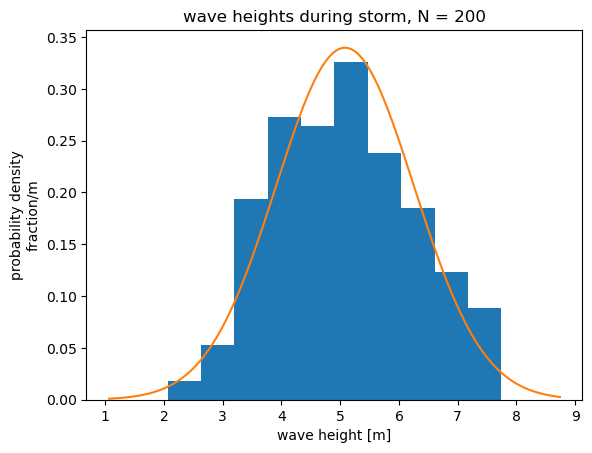

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
N=200
data = np.random.normal(5,scale=1.15,size=N)

x = np.linspace(min(data)-1, max(data)+1, 1000)

plt.hist(data,bins=10,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
plt.title('wave heights during storm, N = 200')
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m')
xl = plt.xlim()

The bars show the sample distribution, or the probability distribution of the 200 samples. The wave heights are separated into categories and divided in to bins of width $\Delta x$. The height of each bar represents a *probability density*.

*Probability density* = (fraction of samples in bin)/$\Delta x$

The total area of the blue bars (the sample distribution) is equal to 1. In other words, the sum of all of the fractions has to equal 1.

The orange line is a hypothetical *normal distribution*. The shape of this hypothetical distribution is defined by two parameters: the mean and standard deviation. This theoretical curve has the same mean and standard deviation as the sample distribution. Statistical techniques often rely on the assumption of theoretical probability distribution to simplify the mathematics involved.

The integral of the area under the orange curve (the theoretical normal distribution) is equal to 1, just like the area of the sample distribution. This is the case for all probability density functions. The integral, or area under the curve, has to equal 1.

### Cumulative distribution

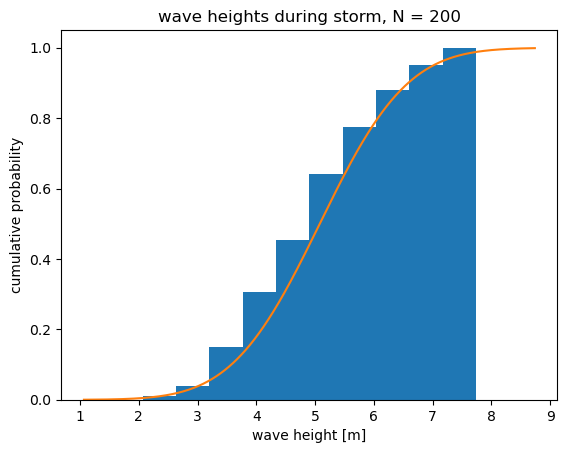

In [2]:
plt.hist(data,bins=10,density=True,cumulative=True)
plt.plot(x, np.diff(x)[0]*np.cumsum(stats.norm.pdf(x, np.mean(data), np.std(data))))
plt.title('wave heights during storm, N = 200')
plt.xlabel('wave height [m]')
plt.ylabel('cumulative probability');

The figure above shows the same sample and theoretical distributions as before, this time expressed as cumulative probability. This is the probability that the data fall with a given interval *or less*.

## Descriptive statistics

### Mean 

With a finite number of $N$ samples, the __true mean__ of a population, $\mu$ ("mu"), can be _estimated_ by the sample mean $\bar{x}$,

$$ \bar{x} = \frac{1}{N}\sum_{i=1}^{N}{x_i} = \frac{1}{N}(x_1+x_2+x_3+....+x_N) $$


### Variance
__Variance__ describes the spread of the data. The sample variance is equal to the sample __standard deviation__ squared ($s^2$). The sample variance is an estimate of the true variance ($\sigma^2$)

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})^2,$$

where $N-1$ is the __degrees of freedom__. Degrees of freedom are the number of independent pieces of information. The variance of one sample ($N=1$) is essentially meaningless because it is always equal to zero, no matter what the value of the sample is. In this case, there are no degrees of freedom. Calculating the variance/standard deviation with $N-1$ in the denominator is called the __unbiased__ estimate of the true standard deviation $\sigma$.

The variance is __positive definite__ because it is the sum of squared values and therefore cannot be negative.

### Standard Error 

The __standard error__ describes how well the sample mean describes the true mean

$$ SE = \frac{s}{\sqrt{N}}. $$

The standard error does not describe the spread of the data, it describes the how well the sample mean, $\bar{x}$, represents the true mean, $\mu$. The standard error can thought of as an estimate of the standard deviation of $(\bar{x} - \mu)$, after many repeated experiments with $N$ samples. 

#### Example revisited: repreated trials

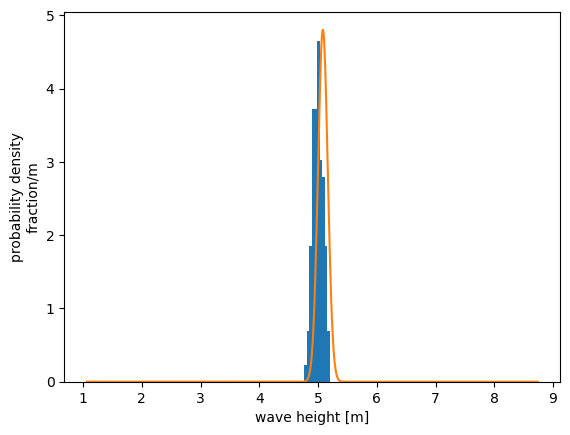

In [3]:
Nsub = 10
xm = np.nan*np.ones(100)

for i in range(100):
    xm[i] = np.mean(np.random.normal(5,scale=1.15,size=N))

plt.figure()
plt.hist(xm,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)/np.sqrt(N)))
plt.xlim(xl)
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m');

Results from 100 repeated trials during same storm (N = 200 each trial). The $x$-axis is the same as that shown for the sample distribution above, to emphasize how the distribution of means clusters more tightly together. We can think of these repeated trials as different instruments measuring different waves in the same storm. Note that this is easy to do with a computer-generated example dataset, but not so easy to do in practices.

Blue bars:
- Probability density of the mean of each trial (mean of all sample means = 4.99m)

Orange curve: 
- Normal distribution
- Mean = Mean of trial 1 (example distribution shown above).
- Standard deviation = Standard error of trial 1, $SE = s/\sqrt{N}$

The standard error from 1 set of samples, gives an estimate of standard deviation (spread) of the means.

#### Importance of sample size

What if only 20 samples had been collected in each experiment, instead of 200? The samples do not describe the underlying normal distribution nearly as well. 

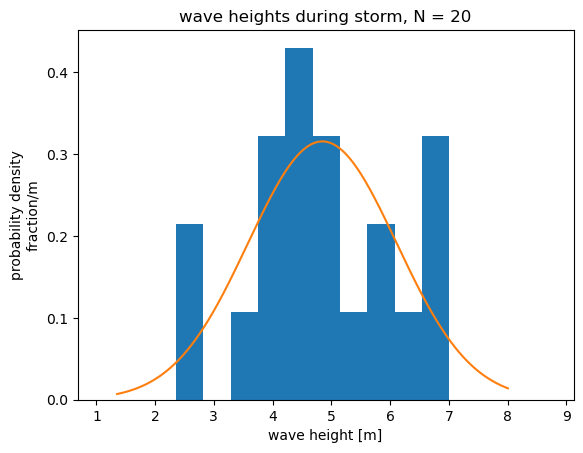

In [4]:
np.random.seed(1)
data = np.random.normal(5,scale=1.15,size=20)

x = np.linspace(min(data)-1, max(data)+1, 1000)

plt.hist(data,bins=10,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
plt.title('wave heights during storm, N = 20')
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m')
plt.xlim(xl);

If we repeat the trials with 20 samples each, the distribution of the means is broader. We have less confidence that sample mean from an individual trial accurately represents the true mean. This is reflected in a larger standard error, $SE = s/\sqrt{N}$. We will see later that the standard error forms the basis for confidence intervals of the mean, a common way of describing uncertainty.

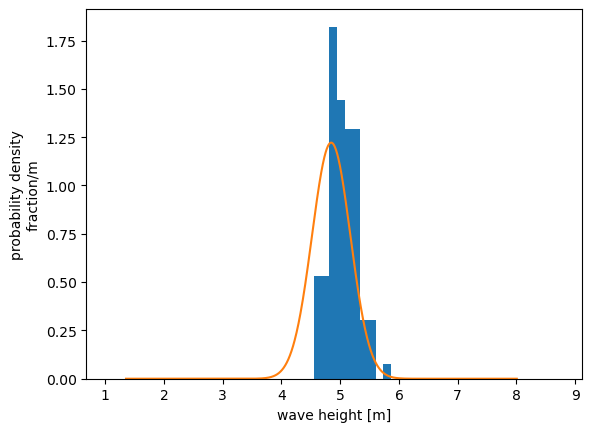

In [5]:
Nsub = 10
xm = np.nan*np.ones(100)

for i in range(100):
    xm[i] = np.mean(np.random.normal(5,scale=1.15,size=20))

plt.figure()
plt.hist(xm,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)/np.sqrt(15)))
plt.xlim(xl)
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m');

## Further Reading

Glover, Jenkins and Doney – Modeling Methods (GJD)

* Sections 2.1-2 - Measurement Theory

Statistical Thinking for the 21st Century (ST21): 

* Chapter 1: Introduction
* Chapter 2: Working with data
* Chapter 4: Summarizing data